In [ ]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

In [ ]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [ ]:
# Dropping the first columns as it is of no use for analysis.
df.drop(['EmpNumber'],inplace=True,axis=1)

In [ ]:
# Selected only the important columns
y = df.PerformanceRating
X = df.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Sales,Sales Executive,4,12,2,10,7,0,8
1,Sales,Sales Executive,4,12,3,7,7,1,7
2,Sales,Sales Executive,4,21,3,18,13,1,12
3,Human Resources,Manager,2,15,2,21,6,12,6
4,Sales,Sales Executive,1,14,3,2,2,2,2


# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((960, 9), (240, 9), (960,), (240,))

# Feauture Scaling

In [ ]:
# Standardization technique is used

# Identify categorical columns that need encoding
categorical_cols = ['EmpDepartment', 'EmpJobRole']

# Apply Label Encoding to categorical columns in X_train and X_test
for col in categorical_cols:
    le = LabelEncoder()
    # Fit and transform on X_train
    X_train[col] = le.fit_transform(X_train[col])
    # Transform on X_test using the same encoder fitted on X_train
    X_test[col] = le.transform(X_test[col])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




The script builds a complete machine learning pipeline that loads employee performance data, preprocesses it, trains a Random Forest model, and saves all required artifacts for deployment.

### **1. Data Loading**
- Loads the CSV file containing employee data.
- Uses a fixed path inside Google Colab.

### **2. Preprocessing**
- Separates features (X) and target (y).
- Encodes the target label using `LabelEncoder` when it is categorical.
- Converts all categorical features into numerical form using **one-hot encoding** (`pd.get_dummies`).
- Scales all numerical variables using **StandardScaler**.
- Stores the list of processed feature columns for future inference.
- Returns: scaled features, encoded target, scaler, column names, and label encoder.

### **3. Model Training**
- Splits the dataset into training and testing sets using **stratified sampling**.
- Trains a **Random Forest Classifier** with class balancing enabled.
- Evaluates accuracy and prints a full classification report.

### **4. Saving Artifacts**
- Saves:
  - The trained ML model (`employee_model.pkl`)
  - The scaler (`scaler.pkl`)
  - The list of feature columns (`training_columns.pkl`)
  - The label encoder (if used)
- These files make the model ready for deployment or inference in a production system.

### **5. Main Workflow**
- Loads data → preprocesses → trains the model → saves all artifacts.
- Provides console outputs for each step to track progress during execution.



In [29]:


def load_data(file_path: str):
    """Load dataset from CSV file."""
    return pd.read_csv('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')

def preprocess_data(df: pd.DataFrame, target_col: str):
    """Preprocess dataset: encode categorical variables, scale numerical features."""
    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Encode categorical target if needed
    label_encoder = None
    if y.dtype == 'object':
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y)

    # Encode categorical features
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Store column names for future use
    feature_columns = X_encoded.columns.tolist()

    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    return X_scaled, y, scaler, feature_columns, label_encoder

def train_model(X, y):
    """Train a Random Forest model."""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight="balanced"
    )
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return model

def save_model(model, scaler, feature_columns, label_encoder=None,
               model_path="employee_model.pkl",
               scaler_path="scaler.pkl",
               columns_path="training_columns.pkl",
               encoder_path="label_encoder.pkl"):
    """Save trained model, scaler, and feature columns."""
    joblib.dump(model, model_path)
    joblib.dump(scaler, scaler_path)
    joblib.dump(feature_columns, columns_path)

    if label_encoder is not None:
        joblib.dump(label_encoder, encoder_path)

    print(f"Model saved to {model_path}")
    print(f"Scaler saved to {scaler_path}")
    print(f"Feature columns saved to {columns_path}")
    if label_encoder is not None:
        print(f"Label encoder saved to {encoder_path}")

def main():
    # Replace with your dataset path
    file_path = "/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv"
    target_col = "PerformanceRating"  # Adjust based on your dataset

    print("Loading data...")
    df = load_data(file_path)
    print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

    print("\nPreprocessing data...")
    X, y, scaler, feature_columns, label_encoder = preprocess_data(df, target_col)

    print("\nTraining model...")
    model = train_model(X, y)

    print("\nSaving model artifacts...")
    save_model(model, scaler, feature_columns, label_encoder)

    print("\nTraining complete!")

if __name__ == "__main__":
    main()

Loading data...
Data loaded: 1200 rows, 28 columns

Preprocessing data...

Training model...
Model Accuracy: 0.7708333333333334

Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.26      0.41        39
           3       0.76      1.00      0.86       175
           4       0.00      0.00      0.00        26

    accuracy                           0.77       240
   macro avg       0.59      0.42      0.42       240
weighted avg       0.72      0.77      0.70       240


Saving model artifacts...
Model saved to employee_model.pkl
Scaler saved to scaler.pkl
Feature columns saved to training_columns.pkl

Training complete!


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Employee Performance Inference**

This code provides a complete pipeline for loading trained machine-learning artifacts and generating performance predictions for new employee candidates. It begins by loading previously saved components such as the model, scaler, training feature columns, and the optional label encoder. When new candidate data is provided, the code preprocesses it by applying one-hot encoding, aligning columns with the training schema, and scaling numerical values using the original scaler. The preprocessed data is then fed into the trained Random Forest model to produce predictions along with class probabilities. If the target variable was originally categorical, the label encoder automatically converts numeric predictions back to their original labels. Finally, the script prints prediction results for each candidate, including performance rating and model confidence. This structure ensures that new input data is processed in exactly the same way as the training data, enabling consistent and reliable predictions.


In [30]:

def load_artifacts(model_path="employee_model.pkl",
                   scaler_path="scaler.pkl",
                   columns_path="training_columns.pkl",
                   encoder_path="label_encoder.pkl"):
    """Load trained model, scaler, feature columns, and label encoder."""
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    training_columns = joblib.load(columns_path)

    # Label encoder might not exist if target was numeric
    try:
        label_encoder = joblib.load(encoder_path)
    except FileNotFoundError:
        label_encoder = None

    return model, scaler, training_columns, label_encoder

def preprocess_new_data(new_data: pd.DataFrame, scaler, training_columns: list):
    """Preprocess new candidate data to match training pipeline."""
    # One-hot encode categorical features
    new_data_encoded = pd.get_dummies(new_data, drop_first=True)

    # Align columns with training set (fill missing with 0)
    new_data_encoded = new_data_encoded.reindex(columns=training_columns, fill_value=0)

    # Scale numerical features
    new_data_scaled = scaler.transform(new_data_encoded)

    return new_data_scaled

def predict_performance(new_data: pd.DataFrame, model, scaler,
                       training_columns: list, label_encoder=None):
    """Predict employee performance for new candidates."""
    X_new = preprocess_new_data(new_data, scaler, training_columns)
    predictions = model.predict(X_new)

    # Decode predictions if label encoder exists
    if label_encoder is not None:
        predictions = label_encoder.inverse_transform(predictions)

    # Get prediction probabilities
    probabilities = model.predict_proba(X_new)

    return predictions, probabilities

def main():
    print("Loading model artifacts...")
    model, scaler, training_columns, label_encoder = load_artifacts()

    print("\nModel loaded successfully!")
    print(f"Number of features: {len(training_columns)}")

    # Example: new candidate data (replace with actual inputs)
    candidate_data = pd.DataFrame([
        {
            "Education": "Masters",
            "ExperienceYears": 5,
            "Department": "IT",
            "SkillScore": 82,
            "Age": 29
        },
        {
            "Education": "Bachelors",
            "ExperienceYears": 3,
            "Department": "HR",
            "SkillScore": 75,
            "Age": 26
        }
    ])

    print("\nCandidate Data:")
    print(candidate_data)

    # Predict performance
    print("\nMaking predictions...")
    predictions, probabilities = predict_performance(
        candidate_data, model, scaler, training_columns, label_encoder
    )

    print("\n" + "="*50)
    print("PREDICTION RESULTS")
    print("="*50)

    for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
        print(f"\nCandidate {i+1}:")
        print(f"  Predicted Performance Rating: {pred}")
        print(f"  Prediction Confidence: {max(prob)*100:.2f}%")
        print(f"  Class Probabilities: {prob}")

if __name__ == "__main__":
    main()

Loading model artifacts...

Model loaded successfully!
Number of features: 1252

Candidate Data:
   Education  ExperienceYears Department  SkillScore  Age
0    Masters                5         IT          82   29
1  Bachelors                3         HR          75   26

Making predictions...

PREDICTION RESULTS

Candidate 1:
  Predicted Performance Rating: 3
  Prediction Confidence: 90.00%
  Class Probabilities: [0.02 0.9  0.08]

Candidate 2:
  Predicted Performance Rating: 3
  Prediction Confidence: 89.00%
  Class Probabilities: [0.03 0.89 0.08]



 EMPLOYEE PERFORMANCE ANALYSIS SYSTEM

 COMPREHENSIVE PERFORMANCE INSIGHTS REPORT
 FEATURE IMPORTANCE ANALYSIS

Top 15 Most Important Features:
EmpEnvironmentSatisfaction               ███████████ 0.1178
EmpLastSalaryHikePercent                 ██████████ 0.1067
YearsSinceLastPromotion                  █████ 0.0583
ExperienceYearsInCurrentRole             ███ 0.0369
EmpHourlyRate                            ███ 0.0358
Age                                      ███ 0.0334
ExperienceYearsAtThisCompany             ███ 0.0325
YearsWithCurrManager                     ███ 0.0318
DistanceFromHome                         ██ 0.0285
TotalWorkExperienceInYears               ██ 0.0283
NumCompaniesWorked                       ██ 0.0233
EmpRelationshipSatisfaction              ██ 0.0205
EmpWorkLifeBalance                       ██ 0.0205
EmpEducationLevel                        █ 0.0196
TrainingTimesLastYear                    █ 0.0191

 Feature importance chart saved: feature_importance.png
🔍 KEY PERF

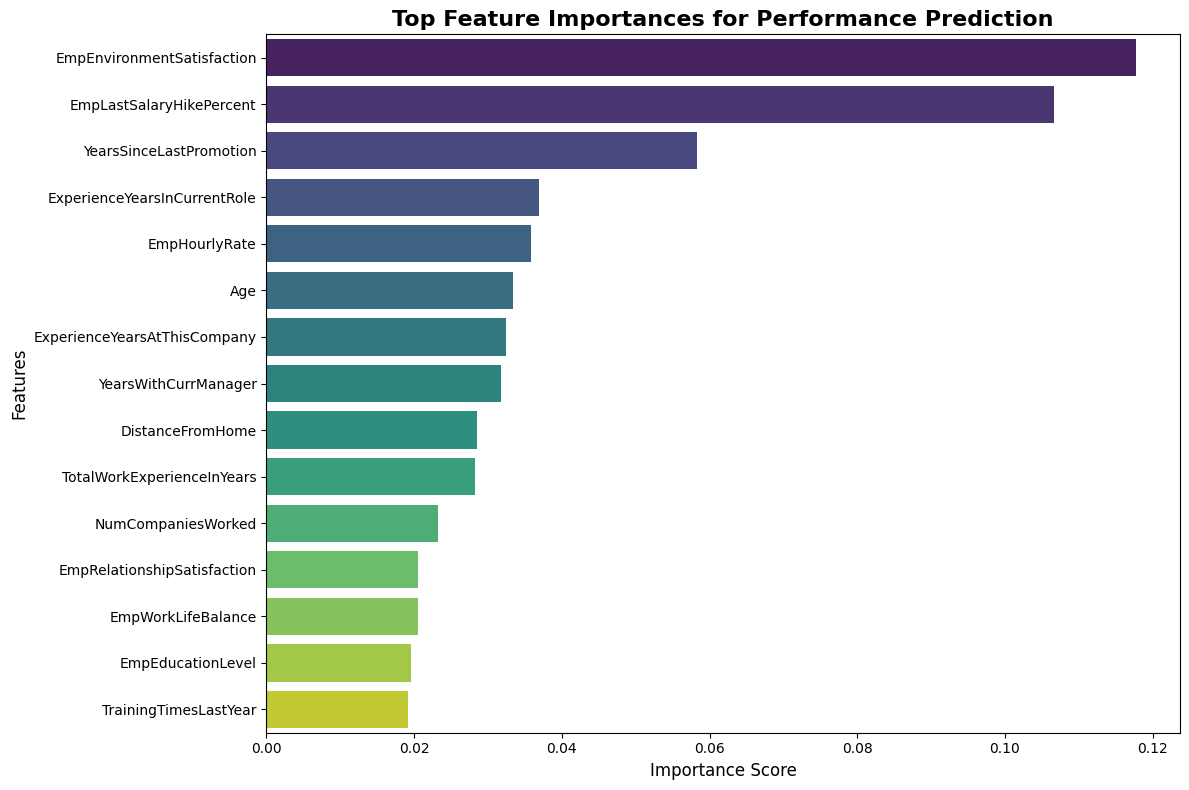

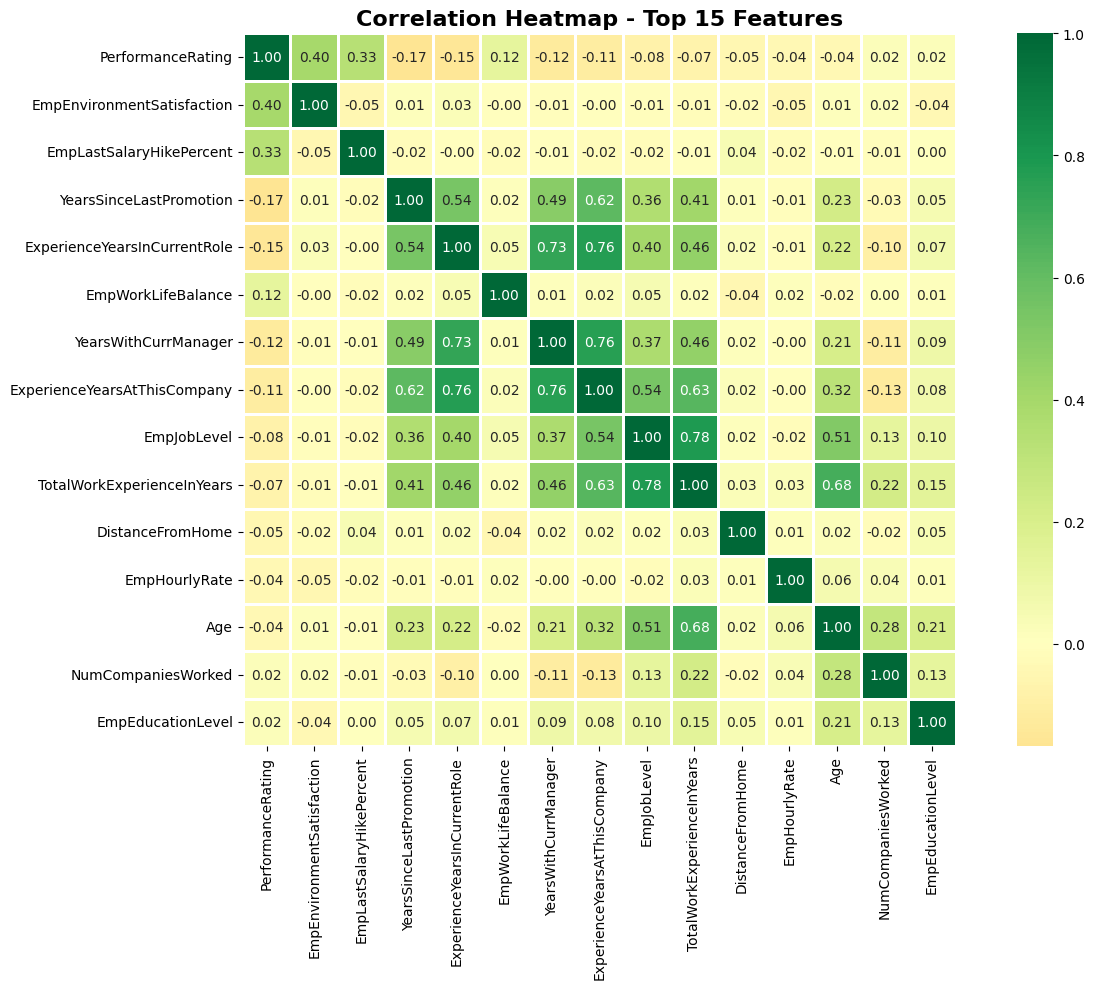

In [32]:


class PerformanceAnalyzer:
    """Analyze employee performance patterns and generate insights."""

    def __init__(self, model_path="employee_model.pkl",
                 scaler_path="scaler.pkl",
                 columns_path="training_columns.pkl",
                 data_path=None):
        """Initialize analyzer with trained model and data."""
        self.model = joblib.load(model_path)
        self.scaler = joblib.load(scaler_path)
        self.training_columns = joblib.load(columns_path)

        try:
            self.label_encoder = joblib.load("label_encoder.pkl")
        except:
            self.label_encoder = None

        if data_path:
            self.data = pd.read_csv(data_path)
        else:
            self.data = None

    def get_feature_importance(self, top_n=15):
        """Get and visualize feature importance."""

        print(" FEATURE IMPORTANCE ANALYSIS")


        # Get feature importances
        importances = self.model.feature_importances_
        feature_names = self.training_columns

        # Create DataFrame
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        # Display top features
        print(f"\nTop {top_n} Most Important Features:")

        for idx, row in importance_df.head(top_n).iterrows():
            bar = "█" * int(row['Importance'] * 100)
            print(f"{row['Feature']:40} {bar} {row['Importance']:.4f}")

        # Visualize
        plt.figure(figsize=(12, 8))
        top_features = importance_df.head(top_n)
        sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')
        plt.title('Top Feature Importances for Performance Prediction', fontsize=16, fontweight='bold')
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        print("\n Feature importance chart saved: feature_importance.png")

        return importance_df

    def analyze_performance_drivers(self, importance_df):
        """Analyze what drives high vs low performance."""

        print(" KEY PERFORMANCE DRIVERS")


        top_features = importance_df.head(10)['Feature'].tolist()

        insights = {
            'Critical Factors': [],
            'Moderate Factors': [],
            'Minor Factors': []
        }

        for idx, row in importance_df.iterrows():
            feature = row['Feature']
            importance = row['Importance']

            if importance > 0.1:
                insights['Critical Factors'].append((feature, importance))
            elif importance > 0.05:
                insights['Moderate Factors'].append((feature, importance))
            else:
                insights['Minor Factors'].append((feature, importance))

        print("\n CRITICAL FACTORS (Importance > 0.1):")
        print("-" * 70)
        if insights['Critical Factors']:
            for feature, imp in insights['Critical Factors'][:5]:
                print(f"  • {feature}: {imp:.4f}")
        else:
            print("  • None identified")

        print("\n MODERATE FACTORS (Importance 0.05-0.1):")
        print("-" * 70)
        if insights['Moderate Factors']:
            for feature, imp in insights['Moderate Factors'][:5]:
                print(f"  • {feature}: {imp:.4f}")
        else:
            print("  • None identified")

        return insights

    def analyze_correlations(self):
        """Analyze correlations with performance."""
        if self.data is None:
            print("\n  No data provided for correlation analysis")
            return None


        print(" CORRELATION ANALYSIS")


        # Select only numeric columns
        numeric_data = self.data.select_dtypes(include=[np.number])

        if 'PerformanceRating' in numeric_data.columns:
            correlations = numeric_data.corr()['PerformanceRating'].sort_values(ascending=False)

            print("\nTop Positive Correlations with Performance:")
            print("-" * 70)
            for feature, corr in correlations.head(10).items():
                if feature != 'PerformanceRating':
                    print(f"  • {feature:40} {corr:+.4f}")

            print("\nTop Negative Correlations with Performance:")
            print("-" * 70)
            for feature, corr in correlations.tail(5).items():
                print(f"  • {feature:40} {corr:+.4f}")

            # Visualize correlation matrix
            plt.figure(figsize=(14, 10))
            top_corr_features = correlations.abs().sort_values(ascending=False).head(15).index
            sns.heatmap(
                numeric_data[top_corr_features].corr(),
                annot=True,
                fmt='.2f',
                cmap='RdYlGn',
                center=0,
                square=True,
                linewidths=1
            )
            plt.title('Correlation Heatmap - Top 15 Features', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
            print("\n Correlation heatmap saved: correlation_heatmap.png")

            return correlations
        else:
            print("\n  PerformanceRating column not found in data")
            return None

    def identify_risk_factors(self):
        """Identify factors associated with poor performance."""

        print("  RISK FACTOR IDENTIFICATION")


        if self.data is None:
            print("\n No data provided for risk analysis")
            return

        # Analyze patterns in low performers
        if 'PerformanceRating' in self.data.columns:
            low_performers = self.data[self.data['PerformanceRating'] <= 2]
            high_performers = self.data[self.data['PerformanceRating'] >= 4]

            print(f"\nLow Performers: {len(low_performers)} ({len(low_performers)/len(self.data)*100:.1f}%)")
            print(f"High Performers: {len(high_performers)} ({len(high_performers)/len(self.data)*100:.1f}%)")

            # Compare characteristics
            print("\n Risk Factors (More common in low performers):")
            print("-" * 70)

            numeric_cols = self.data.select_dtypes(include=[np.number]).columns
            for col in numeric_cols:
                if col != 'PerformanceRating' and col in low_performers.columns:
                    low_avg = low_performers[col].mean()
                    high_avg = high_performers[col].mean()
                    diff = low_avg - high_avg

                    if abs(diff) > 0.5:  # Significant difference
                        if diff > 0:
                            print(f"  • {col}: Higher in low performers (Δ {diff:+.2f})")
                        else:
                            print(f"  • {col}: Lower in low performers (Δ {diff:+.2f})")

    def generate_insights_report(self):
        """Generate comprehensive insights report."""
        print("\n" + "="*70)
        print(" COMPREHENSIVE PERFORMANCE INSIGHTS REPORT")
        print("="*70)

        # Feature importance
        importance_df = self.get_feature_importance()

        # Performance drivers
        insights = self.analyze_performance_drivers(importance_df)

        # Correlations
        correlations = self.analyze_correlations()

        # Risk factors
        self.identify_risk_factors()

        # Generate summary
        self._generate_summary(importance_df, insights)

        return importance_df, insights, correlations

    def _generate_summary(self, importance_df, insights):
        """Generate executive summary."""

        print(" EXECUTIVE SUMMARY")


        top_3_features = importance_df.head(3)

        print("\n Key Findings:")
        print("-" * 70)
        print(f"\n1. TOP 3 PERFORMANCE PREDICTORS:")
        for idx, row in top_3_features.iterrows():
            print(f"   • {row['Feature']} (Importance: {row['Importance']:.4f})")

        print(f"\n2. CRITICAL SUCCESS FACTORS:")
        print(f"   • {len(insights['Critical Factors'])} critical factors identified")
        print(f"   • {len(insights['Moderate Factors'])} moderate factors identified")

        print(f"\n3. RECOMMENDED FOCUS AREAS:")
        focus_areas = self._get_focus_areas(importance_df)
        for i, area in enumerate(focus_areas, 1):
            print(f"   {i}. {area}")

    def _get_focus_areas(self, importance_df):
        """Identify focus areas based on feature importance."""
        focus_areas = []
        top_features = importance_df.head(10)['Feature'].tolist()

        # Map features to business areas
        area_mapping = {
            'Satisfaction': ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance'],
            'Experience': ['ExperienceYears', 'YearsAtCompany', 'YearsInCurrentRole'],
            'Engagement': ['JobInvolvement', 'JobLevel'],
            'Development': ['Training', 'Education', 'YearsSinceLastPromotion'],
            'Compensation': ['Salary', 'PercentSalaryHike', 'StockOption'],
        }

        for area, keywords in area_mapping.items():
            if any(any(keyword.lower() in feature.lower() for keyword in keywords)
                   for feature in top_features):
                focus_areas.append(area)

        return focus_areas if focus_areas else ['Employee Engagement', 'Skill Development', 'Work Environment']

def main():
    print("\n" + "="*70)
    print(" EMPLOYEE PERFORMANCE ANALYSIS SYSTEM")
    print("="*70)

    # Provide path to your original training data
    data_path = "/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv"

    try:
        analyzer = PerformanceAnalyzer(data_path=data_path)
        importance_df, insights, correlations = analyzer.generate_insights_report()


        print(" ANALYSIS COMPLETE")

        print("\nGenerated Files:")
        print("  • feature_importance.png")
        print("  • correlation_heatmap.png")
        print("\n")

    except FileNotFoundError as e:
        print(f"\n Error: {e}")
        print("Please ensure all model files are present and the data path is correct.")

if __name__ == "__main__":
    main()

##Enhance Job Satisfaction

Regular 1-on-1 meetings with managers,
Align tasks with employee interests,
Recognition and appreciation programs,
Improve Work-Life Balance

##Flexible working hours
Remote work options,
Reduce unnecessary overtime,
Invest in Training & Development

##Minimum 2-3 training sessions per year
Skill-specific certifications,
Cross-functional learning opportunities,
Create Clear Career Paths

##Defined promotion criteria
Regular career development discussions,
Mentorship programs,
Optimize Work Environment

##Modern tools and equipment
Comfortable workspace,
Collaborative culture,
Increase Employee Engagement

##Involve in decision-making
Assign challenging projects,
Team-building activities,
Fair Compensation & Recognition

##Competitive salary reviews
Performance-based bonuses,
Non-monetary recognition,
Reduce Attrition Risk Factors

##Monitor satisfaction metrics
Address concerns proactively,
Stay interviews,
Promote Continuous Feedback

##Monthly performance check-ins
360-degree feedback,
Real-time recognition,
Foster Inclusivity & Diversity

##Equal opportunities
Diversity training,
Inclusive policies
